In [126]:
import numpy as np
import matplotlib.pyplot as plt
import os.path

In [127]:
plt.close("all")


### --- IMPORT THE DATA --- ###
### CHANGE PATH TO WHEREVER YOU SAVE THE DATA FILES ### 
data = np.load("./heart_disease_data.npz") 

In [128]:
### --- HELPER FUNCTIONS --- ###
# Function that outputs the indices of x where val occurs
def ind_x_eq_val(x, val):
    return np.where(x==val)[0]


# Function that counts the proportion of all entries in x that are equal to val
def count_x_eq_val(x, val):
    return len(ind_x_eq_val(x, val))/float(len(x))
    

# Function that computes a Gaussian pdf with mean mu and std deviation sig at the values in x
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) / sig / np.sqrt(2 * np.pi)


In [129]:
### --- QUESTION (B) --- ###
# Estimate the pmf of H
P_H0 = count_x_eq_val(data["heart_disease"], 0.)
P_H1 = count_x_eq_val(data["heart_disease"], 1.)

# Estimate the conditional pmf of S given H
P_S_H0 = np.zeros(2)
P_S_H1 = np.zeros(2)
for ind_S in range(2):
    P_S_H0[ind_S] = count_x_eq_val(data["sex"][ind_x_eq_val(data["heart_disease"], 0)], ind_S)
    P_S_H1[ind_S] = count_x_eq_val(data["sex"][ind_x_eq_val(data["heart_disease"], 1)], ind_S)

# Estimate the conditional pmf of C given H
P_C_H0 = np.zeros(4)
P_C_H1 = np.zeros(4)
for ind_C in range(4):
    P_C_H0[ind_C] = count_x_eq_val(data["chest_pain"][ind_x_eq_val(data["heart_disease"], 0)], ind_C)
    P_C_H1[ind_C] = count_x_eq_val(data["chest_pain"][ind_x_eq_val(data["heart_disease"], 1)], ind_C)

# Calculate the MAP estimate
MAP_estimate_S_C = []
for i, j in zip(data["sex_test"], data["chest_pain_test"]):
    P_H0_SC = P_H0*P_S_H0[int(i)]*P_C_H0[int(j)]
    P_H1_SC = P_H1*P_S_H1[int(i)]*P_C_H1[int(j)]
    MAP_estimate_S_C.append(0. if P_H0_SC > P_H1_SC else 1.)
# Calculate the error rate - i.e. the proportion of all predictions that were incorrect
error_rate_S_C = sum(np.array(MAP_estimate_S_C) != data["heart_disease_test"])/len(data["heart_disease_test"])

print("Probability of error " + str(error_rate_S_C))

Probability of error 0.18


In [130]:
np.mean(data["cholesterol"][ind_x_eq_val(data["heart_disease"], 1)])

254.02970297029702

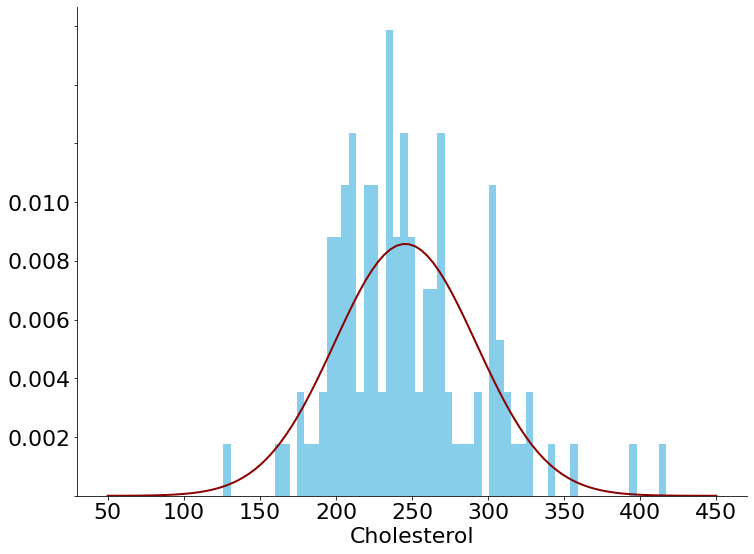

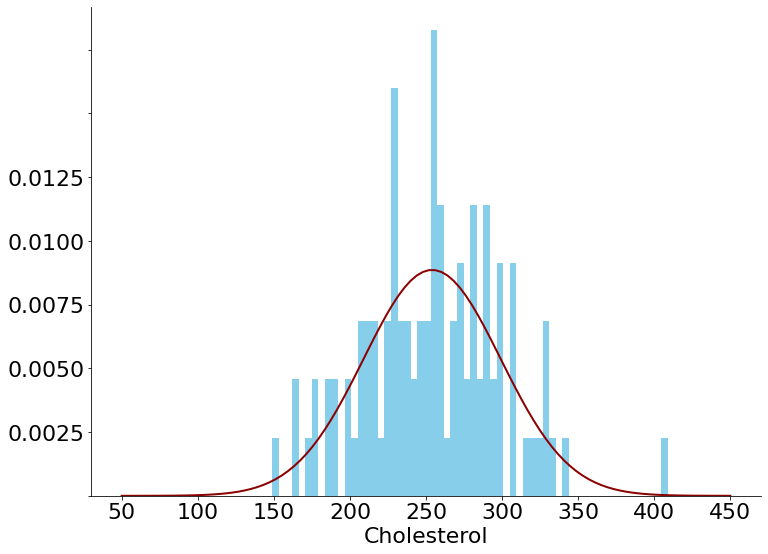

In [131]:
### --- QUESTION (D) --- ###
## Estimate conditional pdf of X given H
mean_X_H = np.zeros(2)
std_X_H = np.zeros(2)
mean_X_H[0]= np.mean(data["cholesterol"][ind_x_eq_val(data["heart_disease"], 0)])
std_X_H[0] = np.std(data["cholesterol"][ind_x_eq_val(data["heart_disease"], 0)])
mean_X_H[1]= np.mean(data["cholesterol"][ind_x_eq_val(data["heart_disease"], 1)])
std_X_H[1] = np.std(data["cholesterol"][ind_x_eq_val(data["heart_disease"], 1)])

n_plot = 100
for i in range(2):
    plt.figure(figsize=(12, 9))  
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left() 
    yticks = ax.yaxis.get_major_ticks()
    yticks[0].label1.set_visible(False) 
    plt.xticks(fontsize=22) 
    plt.yticks(fontsize=22) 
    plt.xlabel("Cholesterol", fontsize=22)  
    
    plt.hist(data["cholesterol"][ind_x_eq_val(data["heart_disease"], i)],bins=60,density=True,edgecolor = "none", color="skyblue")
    
    plt.plot(np.linspace(50, 450, n_plot),gaussian(np.linspace(50, 450, n_plot), 
                     mean_X_H[i], std_X_H[i]), color="darkred", lw=2)

In [132]:
### --- QUESTION (E) --- ###
# Calculate the MAP estimate
MAP_estimate_S_C_X = []
for i, j, x in zip(data["sex_test"], data["chest_pain_test"],data["cholesterol_test"]):
    P_H0_SCX = P_H0*P_S_H0[int(i)]*P_C_H0[int(j)]*gaussian(x, mu = mean_X_H[0], sig = std_X_H[0])
    P_H1_SCX = P_H1*P_S_H1[int(i)]*P_C_H1[int(j)]*gaussian(x, mu = mean_X_H[1], sig = std_X_H[1])
    MAP_estimate_S_C_X.append(0. if P_H0_SCX > P_H1_SCX else 1.)

# Calculate the error rate
error_rate_S_C_X = sum(np.array(MAP_estimate_S_C_X) != data["heart_disease_test"])/len(data["heart_disease_test"])
print("Probability of error using cholesterol " + str(error_rate_S_C_X))

Probability of error using cholesterol 0.14
